# Projet de Machine Learning et Applications 
# M1 MIAGE - Université Paris Dauphine

## Prédiction de l'apparition du diabète sur la base d'un dataset sur le diabète des Indiens Pima
### SOUCCOUCHETTY Darlène & ZHENG Lisa-Marie
### Encadré par AIRIAU Stéphane & ROUCAIROL Milo
Source : Pima Indians Diabetes Database | Kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)


## Mise en contexte
Le dataset qui nous a été soumis comporte des données médicales concernant la population des Indiens Pima d'Amérique du Sud. Le jeu de données rassemble exclusivement des données provenant d'individus de sexe féminin et âgés de 21 ans au moins. 

### Problématique 
Comment prédire l'apparition du diabète au sein de la population féminine des Indiens Pima ?

### Objectif
Il s'agit alors d'analyser les données qui nous ont été fournies et qui en l'occurrence concernent le secteur médical. L'intérêt ici est d'identifier le "meilleur" modèle permettant de prédire et par extension effectuer de la prévention concernant l'apparition du diabète dans cette population donnée.

### Pistes de résolution
Afin d'effectuer ces prédictions, nous allons utiliser différents algorithmes d'apprentissage supervisé et allons comparer leur précision (exprimée en %). Par hypothèse, en nous appuyant sur le cours, nous considérerons qu'un algorithme est performant selon différentes métriques et indicateurs de performance (matrice de confusion et métriques associées, courbes d'apprentissage, courbe ROC). À la suite de cela, nous effectuerons un classement des 3 algorithmes.

### Pourquoi avons-nous choisi d'utiliser des algorithmes d'apprentissage supervisé ?
Compte tenu de notre problématique, il nous a paru plus pertinent d'utiliser des algorithmes d'apprentissage supervisé car nos données sont étiquetées (i.e : on sait que la variable de sortie est une valeur booléenne notée 'Outcome' associée au fait que la personne soit diabétique ou non). 

À partir des attributs médicaux de prédiction, nous allons donc prédire la variable de sortie 'Outcome' qui vaut 1 si la personne est diagnostiquée diabétique, ou 0 sinon.

### Catégories d'algorithmes utilisés
Algorithmes supervisés de classification

- Classification naïve Bayésienne
- K-plus proches voisins
- Arbres de décision
   

### Import des librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import du dataset

In [2]:
diabetes = pd.read_csv(r"C:\Users\user\Downloads/diabetes.csv")

## Pré-visualisation et compréhension des données 

In [3]:
print ("Nombre d'individus de l'échantillon / Nombre d'attributs et de variables de sortie")
diabetes.shape

Nombre d'individus de l'échantillon / Nombre d'attributs et de variables de sortie


(768, 9)

**Commentaires** :
Grâce à la fonction shape(), nous pouvons avoir une première idée de la taille de notre dataset. Nous pouvons voir ici que les données médicales 768 individus de sexe féminin ont été collectées et que le nombre de données médicales collectées sur ces individus est de 9 (et non 10 sachant que la première colonne correspond à l'identifiant de la ligne de l'individu).

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Commentaires** : 
Grâce à ce tableau, nous pouvons voir les 5 premières lignes du dataset, le plus intéressant est que nous pouvons voir quels sont les attributs à notre disposition et quelle est la variable de sortie à prédire.

**Liste des attributs** :
- Pregnancies : qui correspond au nombre de fois que la personne est tombée enceinte ;
- Glucose : qui correspond à la concentration plasmatique de glucose à 2 heures dans un test de tolérance au glucose ; 
- BloodPressure : qui correspond à la pression sanguine diastolique (mm/Hg) ;
- SkinThickness : qui correspond à l'épaisseur du pli cutané du triceps (mm) ;
- Insulin : qui correspond à la quantité d'insuline sérique à 2 heures (mu U/ml) ;
- BMI : qui correspond à l'indice de masse corporelle (poids en kg/(taille en m)²) ;
- DiabetesPedigreeFunction : qui correspond à la fonction généalogique/génétique du diabète ;
- Age : qui correspond à l'âge (en années) de l'individu.

**Variable de sortie** : 
- Outcome : qui correspond aux deux classes à prédire 0 (si la personne n'est pas diabétique) ou 1 (si la personne est diabétique).

À première vue, hypothétiquement, l'attribut qui semble le plus en corrélation avec la variable de sortie 'Outcome' est l'attribut 'Glucose', la majorité des individus ayant une concentration plasmique de glucose inférieure à 90 ont moins de chance d'être diagnostiquées comme étant diabétiques. 

In [5]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Commentaires** : 
Même constat pour les 5 dernières lignes du dataset

In [6]:
print ("0 : Nombre de personnes non-diabétiques dans la population observée")
print ("1 : Nombre de personnes diabétiques dans la population observée")

diabetes.Outcome.value_counts()

0 : Nombre de personnes non-diabétiques dans la population observée
1 : Nombre de personnes diabétiques dans la population observée


0    500
1    268
Name: Outcome, dtype: int64

**Commentaires** : 
Nous pouvons observer que sur notre échantillon de 768 individus, près de 60% de la population ne sont pas diagnostiqués diabétiques tandis que les environ 40% restants sont diagnostiqués diabétiques. 

## Preprocessing (Préparation, nettoyage et transformation des données)

## Préparation des données

### Manque-t-il des données dans notre dataset ?

In [7]:
diabetes.isnull().values.any()

False

**Commentaires** : 
Grâce à cette vérification, nous sommes sûrs que notre jeu de données est fiable, du moins qu'il n'y a pas de valeurs manquantes dans le dataset.

### Existe-t-il des valeurs aberrantes dans notre dataset ?


In [8]:
stat = diabetes.describe()
mediane = diabetes.median()
mediane = mediane.rename('median')
mediane = pd.DataFrame(mediane)
mediane = mediane.transpose()

resultat = pd.concat([stat, mediane])
resultat = resultat.transpose()
resultat = resultat[['count','mean','median','std','min','25%','50%','75%','max']]
resultat = resultat.transpose()

resultat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
median,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Commentaires** :
Nous pouvons constater que l'écart entre le quartile Q3 (75%) et le centile max à 100% que nous noterons C1 est assez conséquent ce qui montre qu'il existe des valeurs aberrantes. L'écart le plus flagrant concerne les attributs 'Insulin' et 'SkinThickness' :
- SkinThickness : ΔC1-Q3 = 99-32 = 67
- Insuline : ΔC1-Q3 = 846-127 = 719

Pour confirmer notre piste, nous allons représenter des distributions sous forme de boîte à moustache et d'histogramme qui nous permettront également d'avoir un aperçu plus "visuel" de ce constat.

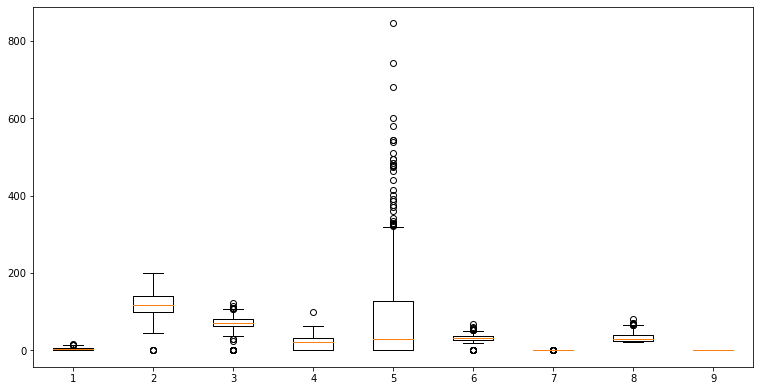

In [9]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
bmoustache = ax.boxplot(diabetes)

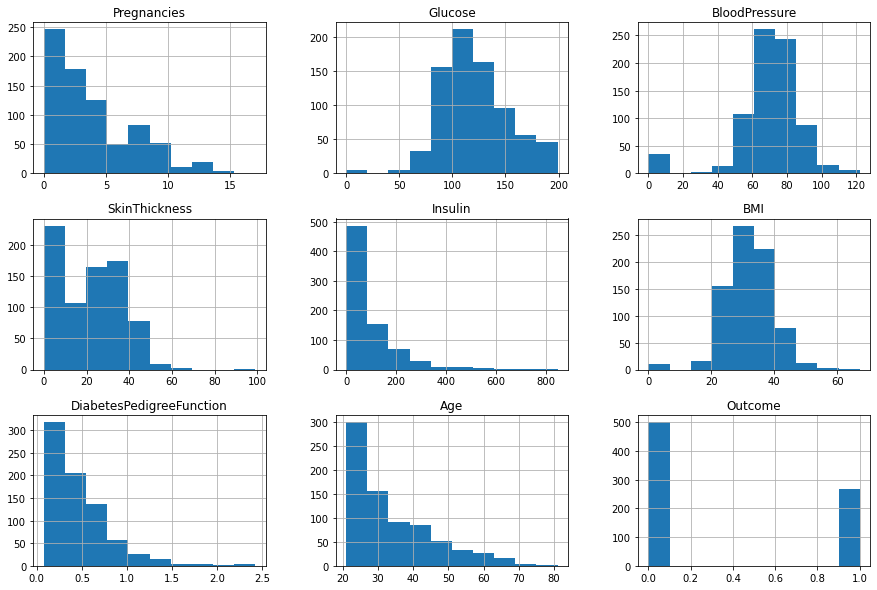

In [10]:
histo = diabetes.hist(figsize=(15, 10))

**Commentaires** :
Visuellement, le constat est le même, il n'y a pas de valeurs manquantes mais il existe bien des valeurs aberrantes comme nous pouvons le voir avec la boîte à moustaches (colonne 5 qui correspond à l'insuline), cela confirme donc nos observations précédentes. Lors de la phase de nettoyage des données, nous allons donc utiliser la méthode de l'écart interquartile afin d'harmoniser les données.

### Existe-t-il des attributs en corrélation ?

<AxesSubplot:>

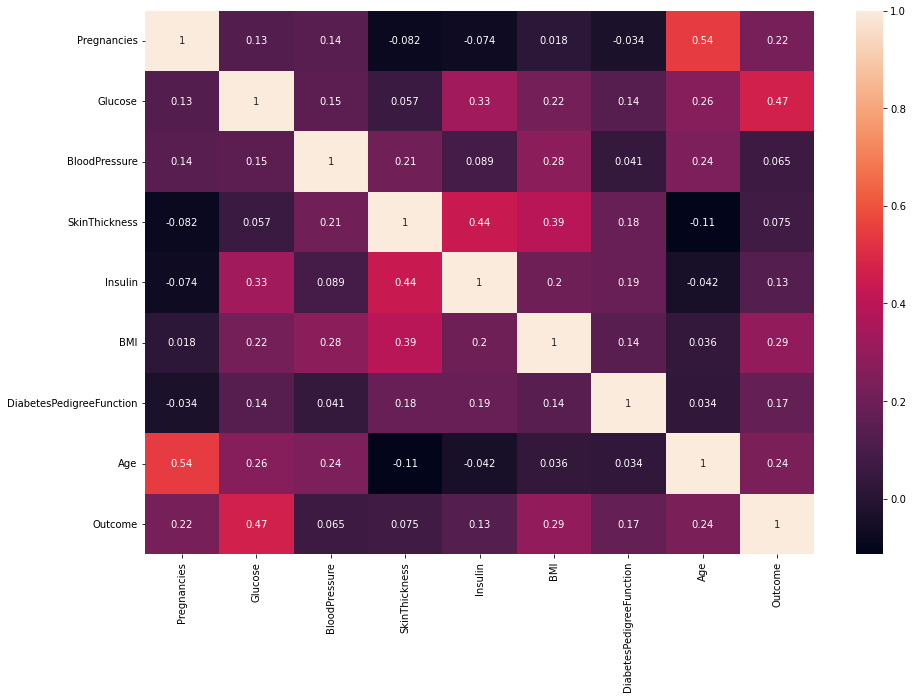

In [11]:
plt.figure(figsize=(15, 10))
correlation = diabetes.corr()
sns.heatmap(correlation,annot=True)

**Commentaires** :
Grâce à la heatmap de la matrice de correlation des données, nous pouvons observer des corrélations moyennes entre les ensembles d'attributs suivants :
- SkinThickness / Insuline (r = 0,44)
- Pregnancies / Age (r = 0,54)
- Glucose / Outcome (r = 0,47)
- SkinThickness / BMI (r = 0,39)

Bien que ces valeurs soient corrélées entre elles, nous estimerons qu'elles ne le sont pas suffisamment pour que nous puissions garder un seul des deux attributs dit "représentatif" de ces couples au dépend de l'autre. Nous garderons donc l'ensemble des attributs qui semblent globalement pertinents, à défaut d'en supprimer certains.

## Nettoyage et transformation des données

In [12]:
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
EI = Q3 - Q1 #Ecart interquartile

diabetes = diabetes[~((diabetes < (Q1 - 1.5 * EI)) | (diabetes > (Q3 + 1.5 * EI))).any(axis=1)] 

stat = diabetes.describe()

mediane = diabetes.median()
mediane = mediane.rename('median')
mediane = pd.DataFrame(mediane)
mediane = mediane.transpose()

donnees_nettoyees = pd.concat([stat, mediane])
donnees_nettoyees = donnees_nettoyees.transpose()
donnees_nettoyees = donnees_nettoyees[['count','mean','median','std','min','25%','50%','75%','max']]
donnees_nettoyees = donnees_nettoyees.transpose()

donnees_nettoyees

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
median,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


**Commentaires** :
Nous pouvons constater que le nettoyage des données a été effectué avec succès puisque l'écart entre le quartile Q3 (75%) et le centile max à 100% pour l'ensemble des attributs a été réduit. Cela est d'autant plus flagrant pour les attributs 'Insulin' et 'SkinThickness' :
- SkinThickness : ΔC1-Q3 = 60-32 = 28
- Insuline : ΔC1-Q3 = 318-120 = 198

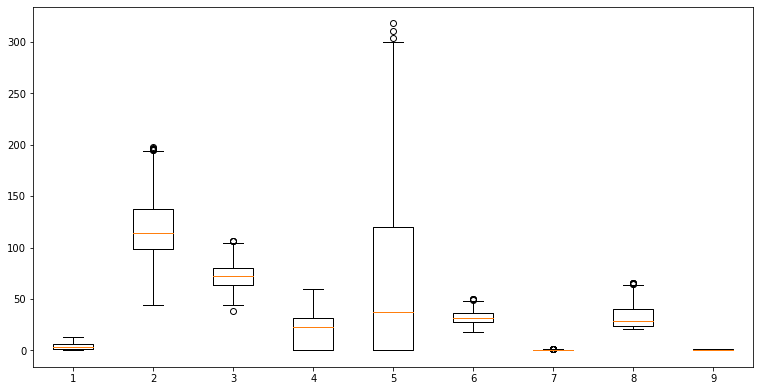

In [13]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
bmoustache = ax.boxplot(diabetes)

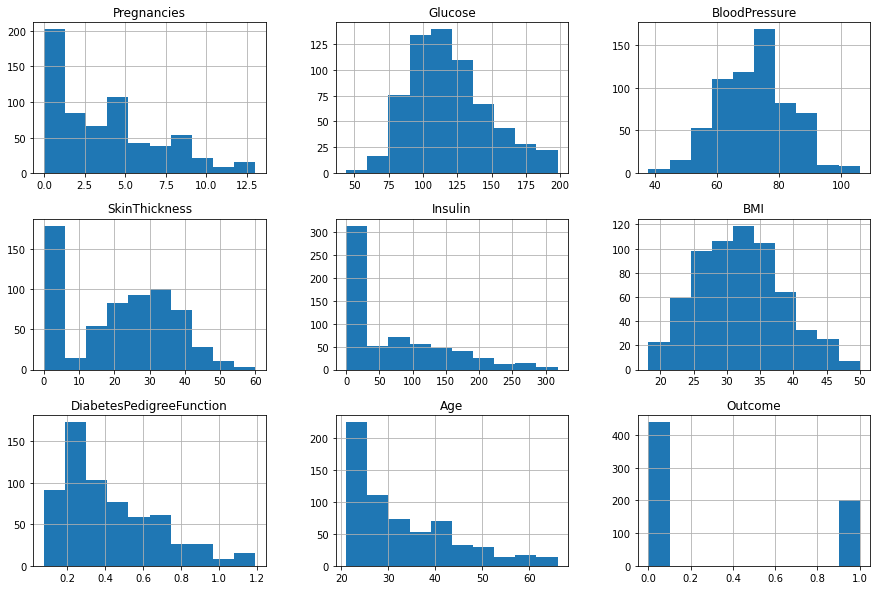

In [14]:
histo = diabetes.hist(figsize=(15, 10))

**Commentaires** :
Même constat avec les graphiques, nous pouvons constater que les points aberrants sont désormais moindres. Nous pouvons donc commencer à dérouler les différents algorithmes de classification (apprentissage supervisé) que nous avons mentionné précedemment.

## Séparation des données du dataset (Entraînement & Test)

In [15]:
a = diabetes['Glucose']
b = diabetes['BloodPressure']
c = diabetes['Pregnancies']
d = diabetes['SkinThickness']
e = diabetes['Insulin']
f = diabetes['BMI']
g = diabetes['DiabetesPedigreeFunction']
h = diabetes['Age']
x = list(zip(a, b, c, d, e, f, g, h))
y = diabetes['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

**Commentaires** :
Dans notre cas, nous considérerons que 20% de nos données seront des données de test, les 80% restants seront des données d'entraînement pour les 3 algorithmes.

## Algorithme de classification naive bayésienne

In [16]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
prediction = gnb.predict(x_test)
print("Tableau des résultats prédits pour les 20% de données test : \n")
print(prediction,"\n")
Exactitude = accuracy_score(y_test, prediction)*100
print("Exactitude de la méthode de classification naive bayésienne : \n",Exactitude,"%") 
Precision = metrics.precision_score(y_test, prediction)*100
print("Precision de la méthode de classification naive bayésienne : \n",Precision,"%") 
Sensibilite =  metrics.recall_score(y_test, prediction)*100
print("Sensibilité de la méthode de classification naive bayésienne : \n",Sensibilite,"%") 
Specificite = metrics.recall_score(y_test, prediction, pos_label=0)*100
print("Spécificité de la méthode de classification naive bayésienne : \n",Specificite,"%") 
Score_F = metrics.f1_score(y_test, prediction)*100
print("Score-F de la méthode de classification naive bayésienne : \n",Score_F,"%") 

Tableau des résultats prédits pour les 20% de données test : 

[0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0] 

Exactitude de la méthode de classification naive bayésienne : 
 78.125 %
Precision de la méthode de classification naive bayésienne : 
 70.27027027027027 %
Sensibilité de la méthode de classification naive bayésienne : 
 60.46511627906976 %
Spécificité de la méthode de classification naive bayésienne : 
 87.05882352941177 %
Score-F de la méthode de classification naive bayésienne : 
 64.99999999999999 %


**Commentaires** :
Les différentes métriques que nous avons pu mettre en évidence nous permetterons d'évaluer nos différents modèles de classification afin de déterminer celui qui a les meilleures performances par rapport à notre problématique.

Ces métriques sont issues de la matrice de confusion relative à l'algorithme de classification naive bayésienne ci-dessous. Chaque métrique permet de mettre en évidence les informations suivantes :

- L'exactitude (accuracy) : permet de mesurer le pourcentage d'exactitude du modèle en son intégralité ;
- La précision : permet de mesurer parmi la population positive prédite, quel pourcentage de la population est réellement positif (évalue seulement les cas positifs correctement prédits) ;
- La sensibilité : permet de mesurer la capacité du modèle à prédire la population positive (évalue les vrais positifs et les faux négatifs, qui ont été prédits à tort comme négatifs) ;
- La spécificité : permet de mesurer la capacité du modèle à prédire la population négative (évalue les vrais négatifs et les faux positifs, qui ont été prédits à tort comme positifs) ;
- Le score F : permet de faire la moyenne entre la précision et la sensibilité, en prenant en compte à la fois les cas de faux positifs et de faux négatifs. Dans notre cas, cet indicateur est très intéressant car notre set de test est plutôt déséquilibré (plus de négatifs que de positifs).

En analysant les différentes métriques obtenues suite au déroulement de l'algorithme de classification naive bayésienne, on pourrait se dire que le modèle est adéquat puisque l'exactitude du modèle est plutôt bonne (≃ 78%).

Les métriques qui nous intéressent le plus dans notre cas sont la précision, la sensibilité et le score-F puisque nous cherchons à prédire les cas positifs de diabète. Dès lors, nous constatons que le modèle est moins performant que prévu puisque ≃ 70% des prédictions sont correctes lorsque l'individu est vraiment positif.

La sensibilité (≃ 60%) nous permet de voir que le modèle est passable pour détecter une maladie (pas forcément avec exactitude) et qu'il existe sûrement des meilleurs algorithmes sur ce point.

Enfin, dans notre cas, nous avons plus d'individus négatifs que positifs dans notre set de test (idem pour notre population globale) ce qui crée un déséquilibre dans nos données. Mais le score-F (≃ 65%) qui permet de "lisser" ce déséquilibre montre bien que notre modèle n'est pas aussi performant que prévu pour prédire les résultats potentiellement positifs.

### Matrice de confusion de l'algorithme de classification naive bayésienne

Text(0.5, 1.0, 'Classification naïve bayésienne')

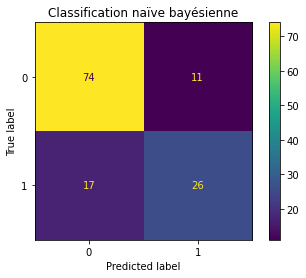

In [17]:
plot_confusion_matrix(gnb,x_test, y_test)

plt.title("Classification naïve bayésienne")

**Commentaires** :
 Grâce à cette représentation graphique de la matrice de confusion associée à l'application de l'algorithme de classification naive bayésienne sur notre modèle de données, nous pouvons constater que sur un échantillon test de 128 individus (i.e : ce qui représente pour rappel 20% de notre population totale) nous avons pu prédire :

- VN : 74/128 ≃ 58% de Vrais Négatifs (Carré supérieur gauche)
- FP : 11/128 ≃ 9% de Faux Positifs (Carré supérieur droit)
- FN : 17/128 ≃ 13% de Faux Négatifs (Carré inférieur gauche)
- VN : 26/128 ≃ 20% de Vrais Positifs (Carré inférieur droit)

Les métriques précédentes nous ont permis d'interpréter ces prédictions obtenues.

### Courbe d'apprentissage de l'algorithme de classification naive bayésienne

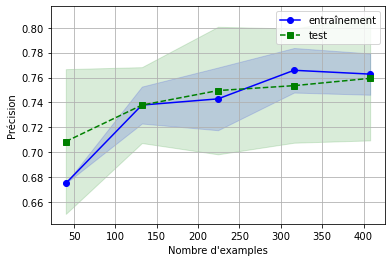

In [38]:
train_sizes, train_scores, test_scores = learning_curve(gnb, X=x_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Précision")
plt.legend(loc='upper right')
plt.show()

**Commentaires** :
En théorie, les performances d'un modèle de classification devraient s'améliorer à mesure que le nombre d'exemples d'entraînement augmente. Dans notre cas, l'augmentation de la précision est de l'ordre de ≃ 0,1 pour l'entrainement et le test ce qui est plutôt faible, il ne paraît donc pas pertinent d'ajouter plus de données pour améliorer le modèle, toutefois il généralise plutôt bien.


Puisque la précision d'entraînement et de validation des données correspondent et viennent même à converger lorsque le nombre d'examples est grand, cela signifie qu'il existe un biais elevé et que le modèle n'est peut être pas vraiment adapté au problème que nous avons à traiter et qu'il y a un problème d'underfitting.

### Courbe ROC de l'algorithme de classification naive bayésienne

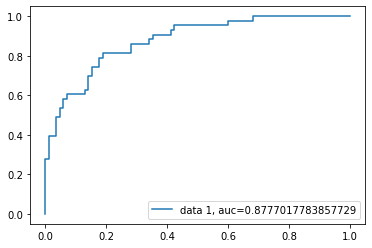

In [19]:
y_pred_proba = gnb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Commentaires** :
En calculant l'aire sous la courbe ROC (AUC) nous obtenons une AUC ≃ 0.87. Cet indicateur montre qu'il s'agit d'un bon modèle pour le dataset donné.

## Algorithme des K-plus proches voisins

In [20]:
kppv = KNeighborsClassifier(n_neighbors=5,  metric='euclidean')
kppv.fit(x_train, y_train)
prediction1 = kppv.predict(x_test)
print("Tableau des résultats prédits pour les 20% de données test : \n")
print(prediction1,"\n")


Exactitude = accuracy_score(y_test, prediction1)*100
print("Exactitude de la méthode des K-plus proches voisins : \n",Exactitude,"%") 
Precision = metrics.precision_score(y_test, prediction1)*100
print("Precision de la méthode des K-plus proches voisins : \n",Precision,"%") 
Sensibilite =  metrics.recall_score(y_test, prediction1)*100
print("Sensibilité de la méthode des K-plus proches voisins : \n",Sensibilite,"%") 
Specificite = metrics.recall_score(y_test, prediction1, pos_label=0)*100
print("Spécificité de la méthode des K-plus proches voisins : \n",Specificite,"%") 
Score_F = metrics.f1_score(y_test, prediction1)*100
print("Score-F de la méthode des K-plus proches voisins : \n",Score_F,"%") 


Tableau des résultats prédits pour les 20% de données test : 

[0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0] 

Exactitude de la méthode des K-plus proches voisins : 
 80.46875 %
Precision de la méthode des K-plus proches voisins : 
 73.68421052631578 %
Sensibilité de la méthode des K-plus proches voisins : 
 65.11627906976744 %
Spécificité de la méthode des K-plus proches voisins : 
 88.23529411764706 %
Score-F de la méthode des K-plus proches voisins : 
 69.13580246913581 %


**Commentaires**
(*Voir explication sur la signification des métriques au niveau du déroulement de l'algorithme de classification naive Bayésienne).

En analysant les différentes métriques obtenues suite au déroulement de l'algorithme des K-plus proches voisins, on pourrait se dire que le modèle est adéquat puisque l'exactitude du modèle est bonne (≃ 80%).

Les métriques qui nous intéressent le plus dans notre cas sont la précision, la sensibilité et le score-F puisque nous cherchons à prédire les cas positifs de diabète. Dès lors, nous constatons que le modèle est performant par rapport aux autres modèles car ≃ 73% de la population positive est réellement positive ce qui constitue un bon résultat.

La sensibilité (≃ 65%) nous permet de voir que le modèle est passable pour détecter une maladie (pas forcément avec exactitude), l'algorithme peut donc être amélioré sur ce point, mais il est demeure meilleur que les deux autres. Le score-F de l'algorithme(≃ 70%) rejoint également cet argument, l'algorithme peut être amélioré mais offre de bien meilleures performances que les deux autres.

### Matrice de confusion de l'algorithme des K-plus proches voisins

Text(0.5, 1.0, 'K-plus proches voisins')

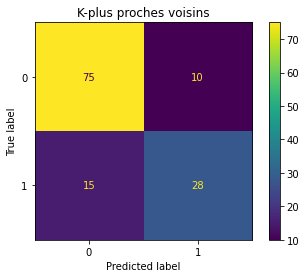

In [21]:
plot_confusion_matrix(kppv,x_test, y_test)

plt.title("K-plus proches voisins")

**Commentaires** :
Grâce à cette représentation graphique de la matrice de confusion associée à l'application de l'algorithme des K-plus proches voisins sur notre modèle de données, nous pouvons constater que sur un échantillon test de 128 individus (i.e : ce qui représente pour rappel 20% de notre population totale) nous avons pu prédire :

- VN : 75/128 ≃ 58% de Vrais Négatifs (Carré supérieur gauche)
- FP : 10/128 ≃ 8% de Faux Positifs (Carré supérieur droit)
- FN : 15/128 ≃ 12% de Faux Négatifs (Carré inférieur gauche)
- VN : 28/128 ≃ 22% de Vrais Positifs (Carré inférieur droit)

Les métriques précédentes nous ont permis d'interpréter ces prédictions obtenues.

### Courbe d'apprentissage de l'algorithme des K-plus proches voisins

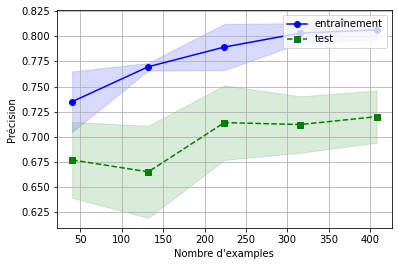

In [36]:
train_sizes, train_scores, test_scores = learning_curve(kppv, X=x_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Précision")
plt.legend(loc='upper right')
plt.show()

**Commentaires** :
En théorie, les performances d'un modèle de classification devraient s'améliorer à mesure que le nombre d'exemples d'entraînement augmente. Dans notre cas, l'augmentation de la précision est de l'ordre de ≃ 0,1 pour la courbe test et pour la courbe entrainement. Cela parait plutot faible mais puisque la précision de la courbe entrainement devient proche de 1, cela signifie de très bonnes performances en globalité sur le set d'entrainement.

Toutefois, nous avons un écart assez important entre la courbe d'entrainement et de test ce qui signifie que le modèle est soumis à une forte variance (problème d'overfitting et de généralisation). Pour l'améliorer sur ce point, il faudrait donc envisager d'augmenter le pourcentage de données d'entrainement, mais l'on risque en parallèle d'augmenter le bruit du modèle. En globalité, malgré ce problème, cette courbe montre que la méthode des K-plus proches voisins est meilleure que les 2 autres.

### Courbe ROC de l'algorithme des K-plus proches voisins

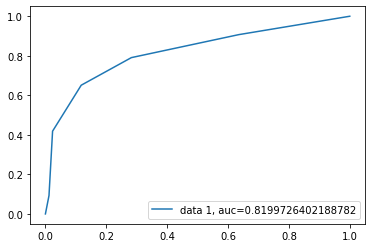

In [23]:
y_pred_proba = kppv.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Commentaires** :
En calculant l'aire sous la courbe ROC (AUC) nous obtenons une AUC ≃ 0.82. Cet indicateur montre qu'il s'agit d'un bon modèle pour le dataset donné.

## Arbres de décision

In [24]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtree.fit(x_train, y_train)
prediction2 = dtree.predict(x_test)
print("Tableau des résultats prédits pour les 20% de données test : \n")
print(prediction2,"\n")

Exactitude = accuracy_score(y_test, prediction2)*100
print("Exactitude de la méthode des arbres de décision : \n",Exactitude,"%") 
Precision = metrics.precision_score(y_test, prediction2)*100
print("Precision de la méthode des arbres de décision : \n",Precision,"%") 
Sensibilite =  metrics.recall_score(y_test, prediction2)*100
print("Sensibilité de la méthode des arbres de décision : \n",Sensibilite,"%") 
Specificite = metrics.recall_score(y_test, prediction2, pos_label=0)*100
print("Spécificité de la méthode des arbres de décision : \n",Specificite,"%") 
Score_F = metrics.f1_score(y_test, prediction2)*100
print("Score-F de la méthode des arbres de décision : \n",Score_F,"%") 


Tableau des résultats prédits pour les 20% de données test : 

[0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0] 

Exactitude de la méthode des arbres de décision : 
 76.5625 %
Precision de la méthode des arbres de décision : 
 78.26086956521739 %
Sensibilité de la méthode des arbres de décision : 
 41.86046511627907 %
Spécificité de la méthode des arbres de décision : 
 94.11764705882352 %
Score-F de la méthode des arbres de décision : 
 54.54545454545454 %


**Commentaires**
(*Voir explication sur la signification des métriques au niveau du déroulement de l'algorithme de classification naive Bayésienne).

En analysant les différentes métriques obtenues suite au déroulement de l'algorithme des K-plus proches voisins, on pourrait se dire que le modèle est adéquat puisque l'exactitude du modèle est plutôt correcte (≃ 76%).

Les métriques qui nous intéressent le plus dans notre cas sont la précision, la sensibilité et le score-F puisque nous cherchons à prédire les cas positifs de diabète. Dès lors, nous constatons que le modèle est performant par rapport aux autres modèles car ≃ 78% de la population positive est réellement positive ce qui constitue un bon résultat.

La sensibilité (≃ 41%) nous permet de voir que le modèle est médiocre pour détecter une maladie (pas forcément avec exactitude) il peut donc dans certains cas passer "à côté" de cas vrais positifs ce qui dans un contexte médical peut constituer un danger. Le score-F de l'algorithme(≃ 54%) rejoint également cet argument, que l'algorithme est plutôt médiocre en globalité.

### Matrice de confusion de la méthode des arbres de décision

Text(0.5, 1.0, 'Arbres de décision')

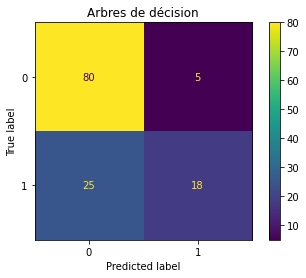

In [25]:
plot_confusion_matrix(dtree,x_test, y_test)

plt.title("Arbres de décision")

**Commentaires** :
Grâce à cette représentation graphique de la matrice de confusion associée à l'application de la méthode des arbres de décision sur notre modèle de données, nous pouvons constater que sur un échantillon test de 128 individus (i.e : ce qui représente pour rappel 20% de notre population totale) nous avons pu prédire :

- VN : 80/128 ≃ 62% de Vrais Négatifs (Carré supérieur gauche)
- FP : 5/128 ≃ 4% de Faux Positifs (Carré supérieur droit)
- FN : 25/128 ≃ 20% de Faux Négatifs (Carré inférieur gauche)
- VN : 14/128 ≃ 14% de Vrais Positifs (Carré inférieur droit)

Les métriques précédentes nous ont permis d'interpréter ces prédictions obtenues.

### Courbe d'apprentissage de la méthode des arbres de décision

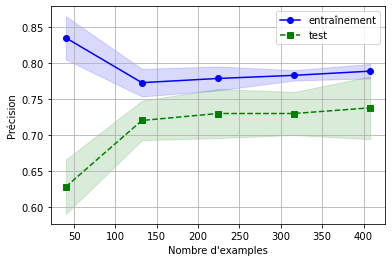

In [37]:
train_sizes, train_scores, test_scores = learning_curve(dtree, X=x_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Précision")
plt.legend(loc='upper right')
plt.show()


**Commentaires** :
En théorie, les performances d'un modèle de classification devraient s'améliorer à mesure que le nombre d'exemples d'entraînement augmente. Dans notre cas, l'augmentation de la précision est de l'ordre de ≃ 0,1 pour la courbe test et pour la courbe entrainement ce qui est plutôt faible compte tenu des performances de base de l'algorithme.

Que cela soit pour la courbe d'entrainement ou la courbe de test, nous constatons une stabilité dans la précision pour les deux courbes. Il ne paraît donc pas pertinent d'ajouter plus de données pour améliorer le modèle, puisque cela n'a aucun impact sur l'augmentation de ses performances.

Il semble il y avoir un problème d'underfitting, le fait que la courbe de test soit en dessous de la courbe d'entraînement témoigne de mauvaises performances.

### Courbe ROC de la méthode des arbres de décision

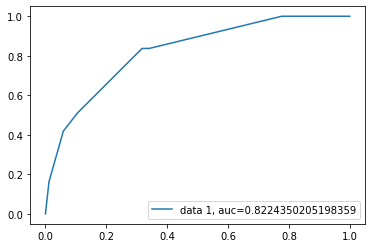

In [27]:
y_pred_proba = dtree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Commentaires** :
En calculant l'aire sous la courbe ROC (AUC) nous obtenons une AUC ≃ 0.82. Cet indicateur montre qu'il s'agit d'un bon modèle pour le dataset donné.

## Conclusion

Grâce aux différentes métriques (indicateurs de précision, aux matrices de confusion, aux courbes d'apprentissage, courbes ROC) des trois différents algorithmes que nous avons appliqué à notre dataset "nettoyé" (i.e : l'impact des valeurs aberrantes sur la fiabilité du modèle a été considérablement réduit avec la méthode de l'écart interquartile), nous pouvons conclure que le meilleur modèle à considérer pour cette problématique est **l'algorithme des K-plus proches voisins**.

